<a href="https://colab.research.google.com/github/oakerekan/Hamoye/blob/main/Time_Series_Analysis_%26_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the important libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from prophet import Prophet


In [2]:
# read the data from the pandas dataFrame
df = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')

In [3]:
# Observing the data
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [4]:
df.shape

(92016, 5)

In [5]:
df["FullDate"] = pd.to_datetime(df["FullDate"])  #convert column to datetime
df.set_index( "FullDate" ,   inplace= True) #set as index to aggregate based on the column
df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


In [6]:
df = df.resample("D").sum()   #Resample the data to daily from the hourly
df.reset_index(level=0, inplace=True) # reset index back
df


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


Text(0, 0.5, 'ElecPrice')

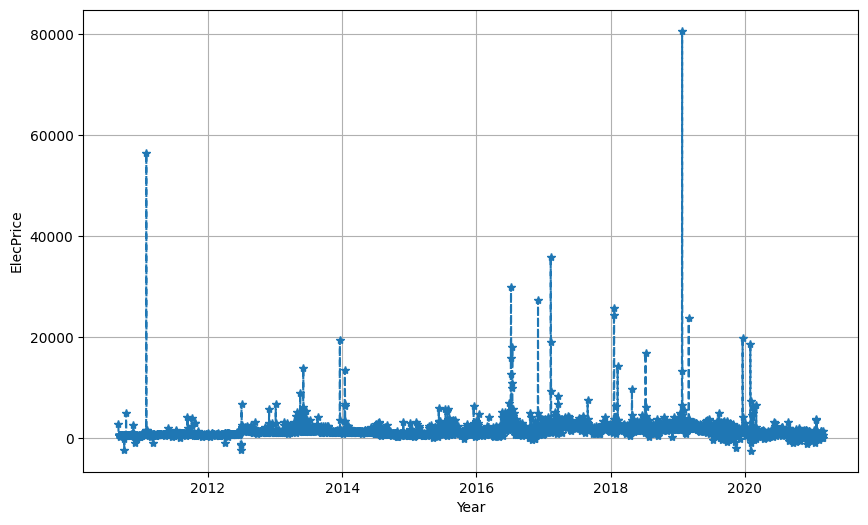

In [7]:
'''Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). 
Which of the following is a plot of ElecPrice over time?
'''
# no 11

plt.figure(figsize=( 10 , 6 )) 
plt.plot(df["FullDate"],   df["ElecPrice"], '--' ,   marker= '*' ,   ) 
plt.grid() 
plt.xlabel( 'Year' ) 
plt.ylabel( 'ElecPrice' )

In [8]:
# Using the Augmented Dickey-Fuller unit root test to test for stationary
#  No 12
from  statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(df['SysLoad'])  
print(f'p-value[SysLoad]: {round(adf_result[1],6)}') 

adf_result2 = adfuller(df['GasPrice'])
print(f'p-value[GasPrice]: {round(adf_result2[1],6)}')

p-value[SysLoad]: 0.004254
p-value[GasPrice]: 0.045027


In [9]:
adf_result = adfuller(df['GasPrice'])        
print(f'GasPrice 10%: {round(adf_result[ 4 ]["10%"],4)}')
  
adf_result2 = adfuller(df['ElecPrice'])    
print(f'ElecPrice 5%: {round(adf_result[ 4 ]["5%"],4)}')

GasPrice 10%: -2.5672
ElecPrice 5%: -2.8623


In [10]:
# Renaming columns 'ds' and 'y' to fit into the Prophet model
# no 13

df = df.rename(columns={"FullDate":"ds", "ElecPrice" : "y"})

df_train = df.iloc[:2757]
df_test = df.iloc[2757:]

df_train.shape


(2757, 5)

In [11]:
# Creating  an  instance of the Prophet algorithm
model = Prophet()
model.fit(df_train)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcb_rufvg/ocd_1o5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcb_rufvg/87yceh53.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51779', 'data', 'file=/tmp/tmpcb_rufvg/ocd_1o5w.json', 'init=/tmp/tmpcb_rufvg/87yceh53.json', 'output', 'file=/tmp/tmpcb_rufvg/prophet_modelkiy8nfec/prophet_model-20230404213241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:32:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:32:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


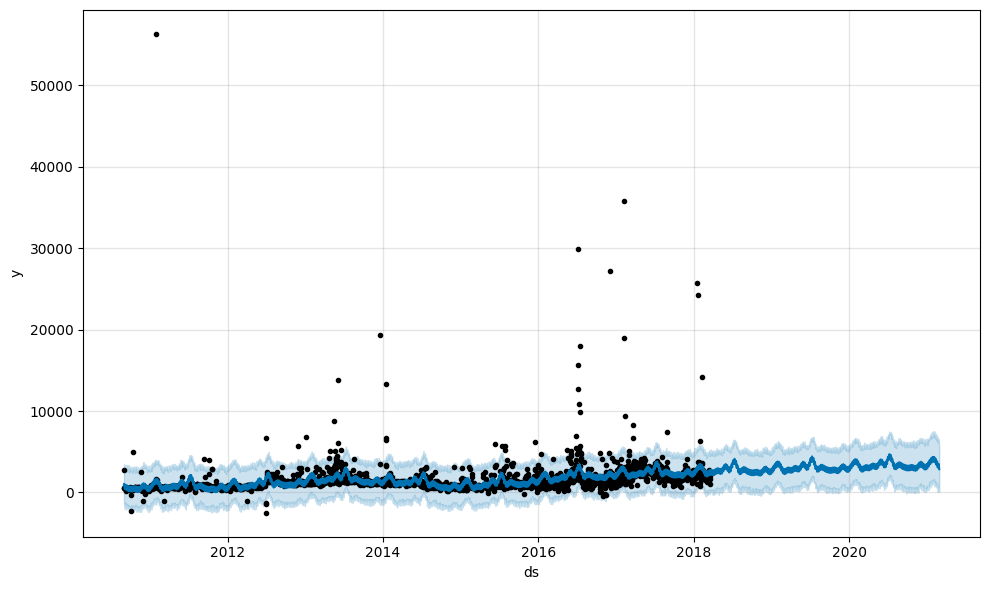

In [12]:
# Forecasting Electricity Price using prophet for the next 1077 days


future = model.make_future_dataframe(periods = 1077, freq = "D")
forecast = model.predict(future)
forecast.head()
model.plot(forecast)
plt.show()

In [13]:
#  Creating a Function to define the mean absolute percentage error
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test- pred)/y_test))*100
    return round(mape,2)

In [14]:
# Getting the prediction made by Prophet

pred = forecast.iloc[2757:]['yhat']
pred.shape

y_test = df_test["y"]
y_test.shape


(1077,)

In [15]:
# Mean absolute percentage error
mape(y_test, pred)

546.46

In [16]:
# Root Mean Square Error
def rmse(y_test, pred):
  y_test, pred = np.array(y_test), np.array(pred)
  rmse = np.sqrt(np.mean((y_test - pred)**2))
  return round(rmse, 2)



In [17]:
rmse(y_test, pred)

3211.82

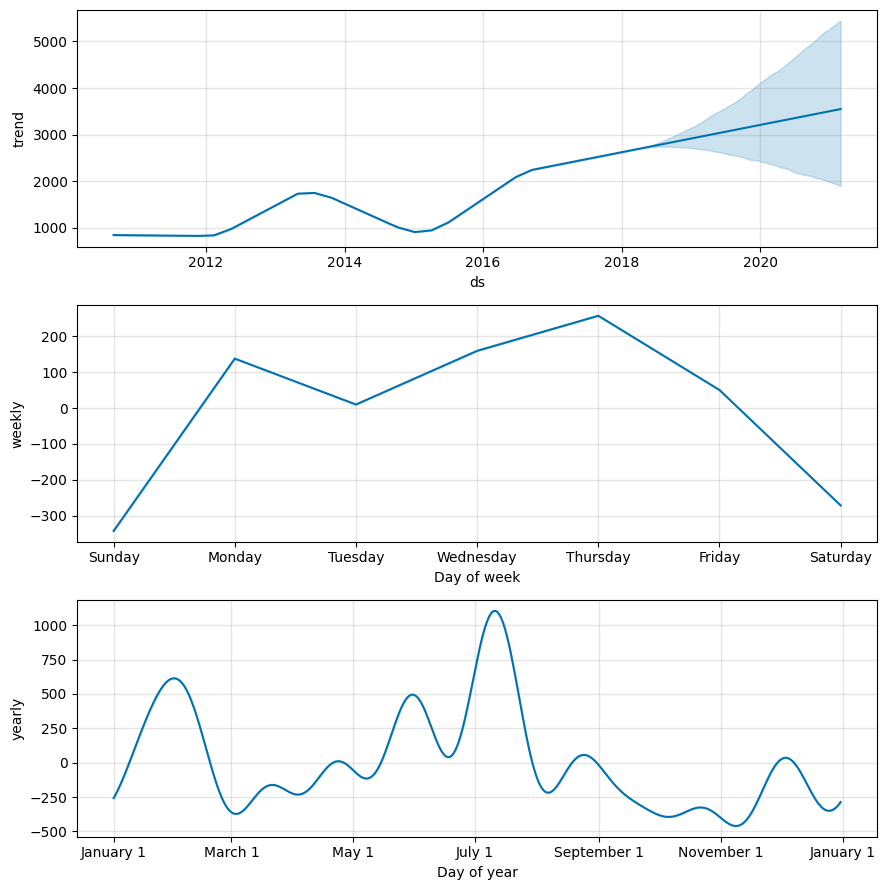

In [18]:
# Plot component to show trends, weekly and monthly

model.plot_components(forecast)
plt.show()

**July is the month with the highest value based on monthly seasonality from the plot component chart**


In [19]:
# Multivariate model with 'Tmax', 'SysLoad', 'GasPrice' as regressor. 
model_new = Prophet()

model_new.add_regressor('Tmax')
model_new.add_regressor('SysLoad')
model_new.add_regressor('GasPrice')

model_new.fit(df_train)

future_data = model_new.make_future_dataframe(periods = 1077, freq = 'D')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcb_rufvg/1n167dy6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcb_rufvg/q7lj_uq2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32410', 'data', 'file=/tmp/tmpcb_rufvg/1n167dy6.json', 'init=/tmp/tmpcb_rufvg/q7lj_uq2.json', 'output', 'file=/tmp/tmpcb_rufvg/prophet_model1zd4ri_j/prophet_model-20230404213251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:32:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:32:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [20]:
future_data = df[['ds', 'Tmax', 'SysLoad', 'GasPrice']]
future_data.head()

,ds,Tmax,SysLoad,GasPrice
0,2010-09-01,379.2,41565.380,88.56
1,2010-09-02,369.6,38898.990,88.56
2,2010-09-03,439.2,41665.760,106.80
3,2010-09-04,328.8,35638.085,81.36
4,2010-09-05,357.6,35611.410,106.80


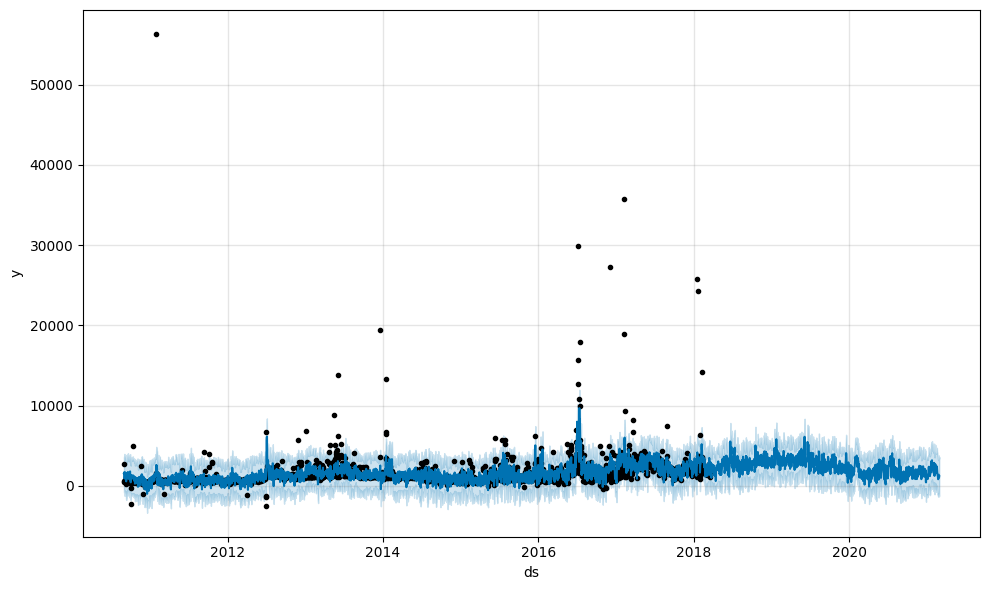

In [21]:
forecast_new = model_new.predict(future_data)
forecast_new.head()
model.plot(forecast_new)
plt.show()

In [22]:
y_test = df_test["y"]

pred = forecast_new.iloc[2757:]['yhat']


In [23]:
# calculate the mape of the multivariate analysis

mape(y_test, pred)

231.6

In [24]:
# calculate the rmse of the multivariate analysis

rmse(y_test, pred)

2707.29

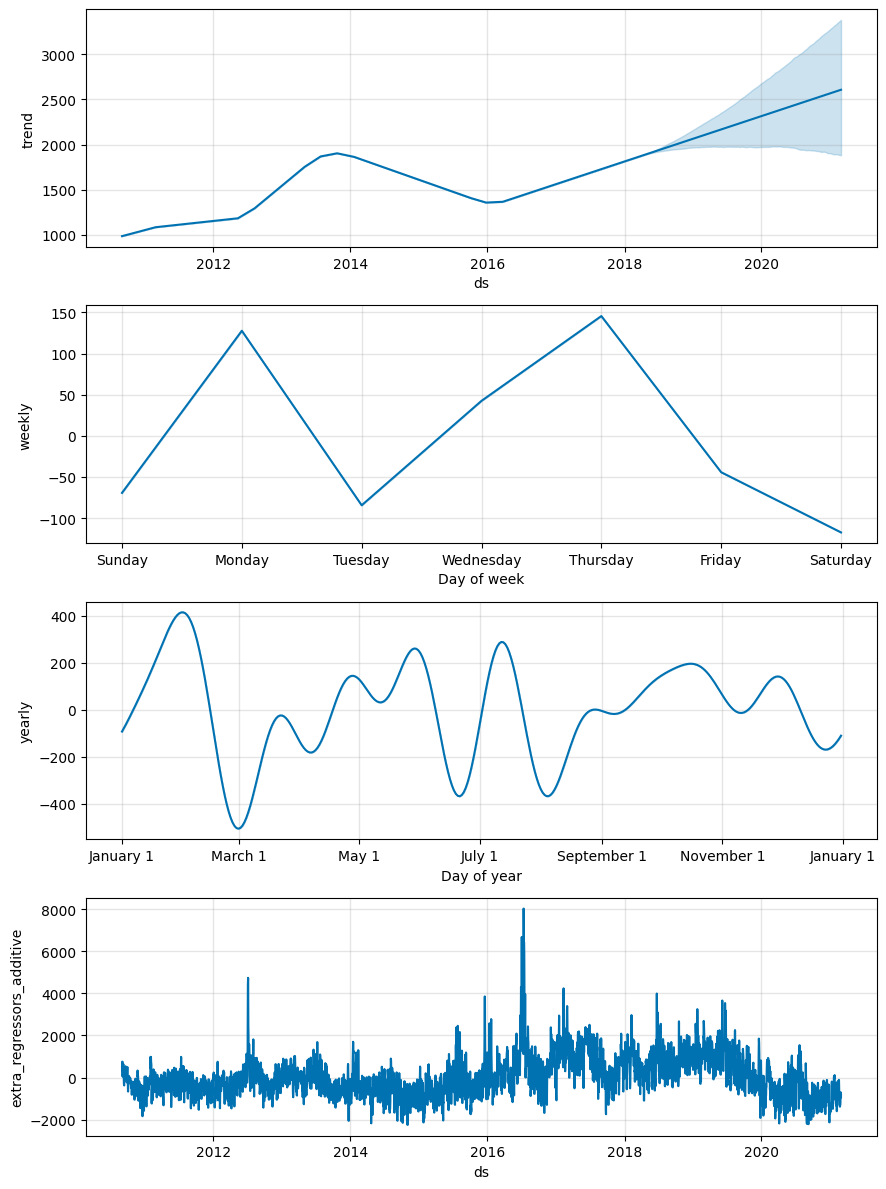

In [25]:
model_new.plot_components(forecast_new)
plt.show()

**Thursday has the highest value in the multivariate forecasted model daily seasonality**

In [26]:
# Multivariate model with 'Tmax', 'SysLoad', 'GasPrice' as regressor. 
model_new = Prophet()

model_new.add_regressor('SysLoad')
model_new.add_regressor('GasPrice')

model_new.fit(df_train)

future_data = model_new.make_future_dataframe(periods = 1077, freq = 'D')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcb_rufvg/lbbycsfm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcb_rufvg/cspifgyo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22680', 'data', 'file=/tmp/tmpcb_rufvg/lbbycsfm.json', 'init=/tmp/tmpcb_rufvg/cspifgyo.json', 'output', 'file=/tmp/tmpcb_rufvg/prophet_modelgxq1_7ik/prophet_model-20230404213300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:33:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:33:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [27]:
future_data = df[['ds', 'SysLoad', 'GasPrice']]
future_data.head()

,ds,SysLoad,GasPrice
0,2010-09-01,41565.380,88.56
1,2010-09-02,38898.990,88.56
2,2010-09-03,41665.760,106.80
3,2010-09-04,35638.085,81.36
4,2010-09-05,35611.410,106.80


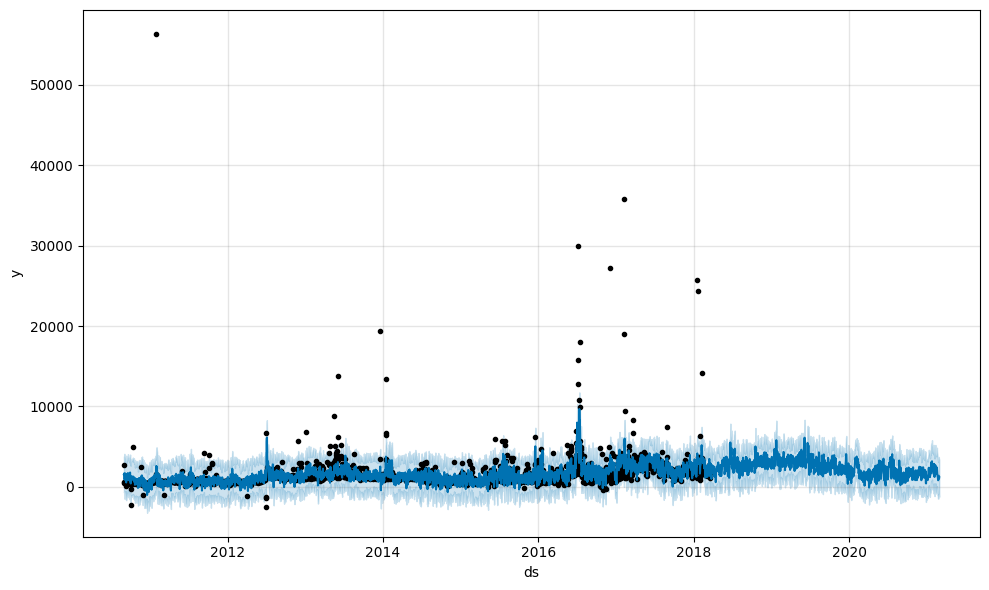

In [28]:
forecast_new = model_new.predict(future_data)
forecast_new.head()
model.plot(forecast_new)
plt.show()

In [29]:
y_test = df_test["y"]

pred = forecast_new.iloc[2757:]['yhat']


In [30]:
# calculate the mape of the multivariate analysis

mape(y_test, pred)

232.84